# Logistic Regression 

Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data description

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [8]:
df['target'].unique()

array([1, 0])

In [9]:
# The output (Target) contain only 2 possible output 0 or 1 . It is a binary classification dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

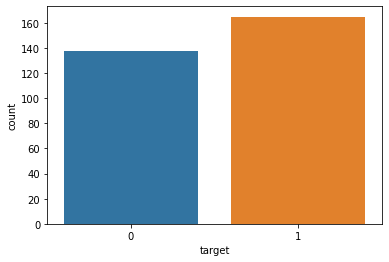

In [10]:
sns.countplot(x='target',data=df)

In [11]:
# The output is evenly distributed and we can use accuracy as the performance measure.

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# We will be using stdscaller for scalling the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
# 10% of data for test and 90% for training with 101 as random state

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegressionCV 
# We will be using CV (inbuild crossvalidation logistic reg model to train out data)

In [20]:
log_model = LogisticRegressionCV()

In [21]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [22]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [23]:
#Model Performance Evaluation

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [25]:
y_pred = log_model.predict(scaled_X_test)

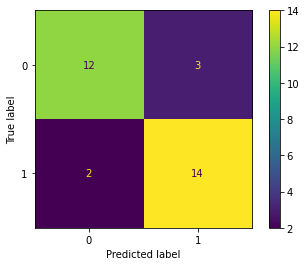

In [27]:
#confusion_matrix
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [28]:
# precision, recall, f1 score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [30]:
# Prediction on new data

new_data= [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

# As our model is trained on scaled data, we will have to scale this new data too

new_scaled_data= scaler.transform(new_data)
print(new_scaled_data)

[[-0.03345031  0.69737995 -0.94692412 -0.55319325  0.75524961 -0.42732739
  -0.99577247 -1.49008466  1.47064295  1.97686092 -0.67167968  1.23823052
  -0.4842146 ]]


In [32]:
log_model.predict(new_scaled_data)

array([0])

In [33]:
log_model.predict_proba(new_scaled_data)

array([[0.94751173, 0.05248827]])

In [ ]:
#For this new data, our model is 94% sure that it will be a 0 class